#Main Code

In [2]:
!pip install geojson

In [3]:
!pip install scikit-image

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
#from numba import jit,cuda
import os
import geojson
import cv2
import skimage
#import torch,torchvision 
#import lmdb

In [5]:
from skimage.draw import polygon,polygon2mask

In [63]:
with open('/content/countries.geo.json') as f:
  s=f.read()

In [64]:
loader=geojson.loads(s)

In [65]:
#s

In [66]:
#len(loader['features'])

In [67]:
#loader['features'][170]

In [68]:
#len(loader['features'][28]['geometry']['coordinates'][1][0])

In [69]:
#len(coordinates)

In [70]:
#np.add(100,coordinates[0])

#Important Functions


In [71]:
# reads data
def cords_loader(loader):
  coordinates=[]
  for i in range(len(loader['features'])):
    if loader['features'][i]['geometry']['type']=='Polygon':
      coordinates.append(loader['features'][i]['geometry']['coordinates'][0])
    #Testing Addition
    elif loader['features'][i]['geometry']['type']=='MultiPolygon':
      for j in range(len(loader['features'][i]['geometry']['coordinates'])):
        coordinates.append(loader['features'][i]['geometry']['coordinates'][j][0])
  return coordinates

    

In [72]:
#offsets data to avoid negative integers
def cvt_cords2int(coordinates,offset):
  cords_int=[]
  for i in range(len(coordinates)):
    cords_int.append(np.add(offset,coordinates[i]).astype('int32'))
  return cords_int

In [73]:
def int2mask(cords_int,mask_size):
  mask=np.zeros(mask_size,dtype=np.bool)
  for i in range(len(cords_int)):
    mask=np.logical_or(mask,polygon2mask(mask_size,cords_int[i]))
  return mask

In [74]:
def draw_mask(loader,mask_size,offset):
  coordinates=cords_loader(loader)
  cords_int=cvt_cords2int(coordinates,offset)
  return int2mask(cords_int,mask_size)

#Image Display

In [75]:
mask_size=(300,300)
offset=175

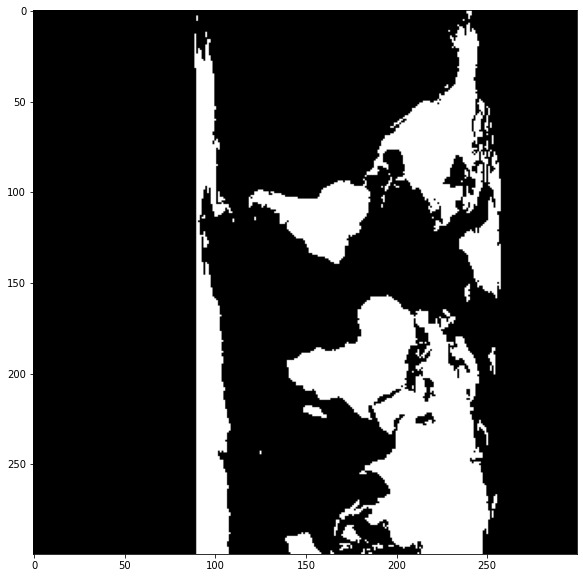

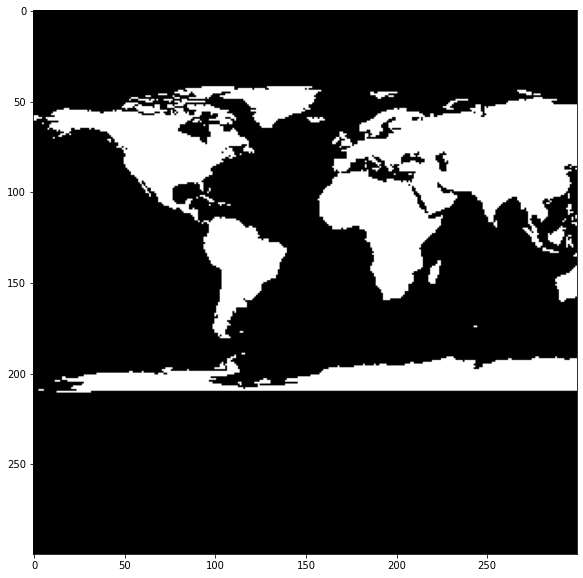

In [76]:
plt.figure(figsize=(10,10))
plt.imshow(draw_mask(loader,mask_size,offset),cmap='binary_r')
plt.figure(figsize=(10,10))
plt.imshow(np.rot90(draw_mask(loader,mask_size,offset),1),cmap='binary_r')

#Commented

In [ ]:
!pip install --upgrade setuptools pip
!pip install openslide
!apt update && apt install -y openslide-tools
!pip install openslide-python
!pip install py_wsi

In [ ]:
!pip install numba

In [ ]:



!git clone https://github.com/cosmiq/solaris.git
!cd /content/solaris

In [ ]:
#!pip install -r /content/solaris/requirements.txt

In [ ]:
!apt install gdal-bin python-gdal python3-gdal --quiet
!apt install python3-rtree --quiet
!apt install libgdal-dev libproj-dev --quiet
!apt install libgeos-dev
!pip install git+git://github.com/geopandas/geopandas.git --quiet
!pip install descartes --quiet
!pip install splot hvplot geoviews --quiet

In [ ]:
!apt install python-cartopy python3-cartopy --quiet
!apt install gdal-bin python-gdal python3-gdal --quiet
!apt install python3-rtree --quiet
!apt install libgdal-dev libproj-dev --quiet
!apt install libgeos-dev
!pip install git+git://github.com/geopandas/geopandas.git --quiet
!pip install descartes --quiet
!pip install urbanaccess pandana pysal --quiet
!pip install splot hvplot geoviews --quiet
!pip install --no-binary shapely shapely --upgrade --force-reinstall --quiet

#Commented

In [48]:
#generates an empty image

In [39]:
#pg=polygon(cords_int[0][:,0],cords_int[0][:,1])
#pg[1]


In [40]:
#cords_int[0][:,0]

In [20]:
# combines all masks
#for i in range(len(cords_int)):
  #pg=polygon(cords_int[i][:,0],cords_int[i][:,1])
 # mask=np.logical_or(mask,polygon2mask((1024,1024),cords_int[i]))

In [21]:
#polygon2mask((512,512),cords_int[0])

In [22]:
#mask=draw_mask(loader)

In [23]:
#plt.imshow(mask,cmap='binary_r')

In [24]:
'''def draw_mask(loader):
  coordinates=[]
  # reads data
  for i in range(len(loader['features'])):
    if loader['features'][i]['geometry']['type']=='Polygon':
      coordinates.append(loader['features'][i]['geometry']['coordinates'][0])
    #Testing Addition
    elif loader['features'][i]['geometry']['type']=='MultiPolygon':
      for j in range(len(loader['features'][i]['geometry']['coordinates'])):
        coordinates.append(loader['features'][i]['geometry']['coordinates'][j][0])
  #offsets data to avoid negative integers
  cords_int=[]
  for i in range(len(coordinates)):
    cords_int.append(np.add(200,coordinates[i]).astype('int32'))
  #generates black image
  mask=np.zeros((512,512),dtype=np.bool)
  # combines all masks
  for i in range(len(cords_int)):
    mask=np.logical_or(mask,polygon2mask((512,512),cords_int[i]))
  return mask'''

"def draw_mask(loader):\n  coordinates=[]\n  # reads data\n  for i in range(len(loader['features'])):\n    if loader['features'][i]['geometry']['type']=='Polygon':\n      coordinates.append(loader['features'][i]['geometry']['coordinates'][0])\n    #Testing Addition\n    elif loader['features'][i]['geometry']['type']=='MultiPolygon':\n      for j in range(len(loader['features'][i]['geometry']['coordinates'])):\n        coordinates.append(loader['features'][i]['geometry']['coordinates'][j][0])\n  #offsets data to avoid negative integers\n  cords_int=[]\n  for i in range(len(coordinates)):\n    cords_int.append(np.add(200,coordinates[i]).astype('int32'))\n  #generates black image\n  mask=np.zeros((512,512),dtype=np.bool)\n  # combines all masks\n  for i in range(len(cords_int)):\n    mask=np.logical_or(mask,polygon2mask((512,512),cords_int[i]))\n  return mask"

#Commented

In [172]:

coordinates=loader['features'][0]['geometry']['coordinates'][0]
np_cords=np.array(coordinates)

In [173]:
cords_int=np_cords.astype('int32')

In [174]:
cords_int[:5]

array([[61, 35],
       [62, 35],
       [62, 35],
       [63, 35],
       [63, 36]], dtype=int32)

In [175]:
pg=polygon(cords_int[:,1],cords_int[:,0])

In [176]:
pg

(array([29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31,
        31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
        33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 35,
        35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 36, 36, 37]),
 array([60, 61, 62, 63, 64, 65, 61, 62, 63, 64, 65, 60, 61, 62, 63, 64, 65,
        66, 67, 68, 60, 61, 62, 63, 64, 65, 66, 67, 68, 60, 61, 62, 63, 64,
        65, 66, 67, 68, 69, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 63,
        64, 65, 66, 67, 68, 69, 70, 64, 65, 66, 67, 68, 69, 70, 72, 73, 70]))

In [364]:
#pol=np.array([[2,3],[3,1],[4,0]])
mask=polygon2mask((256,256),cords_int[0])

In [365]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])